In [45]:
from easyocr import Reader
import cv2
from matplotlib import pyplot as plt


image = cv2.imread(f"./images/3.jpg")
image = cv2.resize(image, (800, 600))

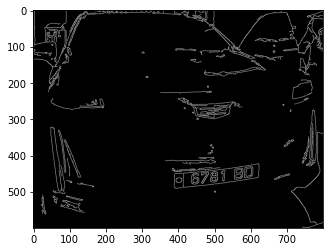

In [46]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
blur = cv2.GaussianBlur(gray, (5,5), 0) 
edged = cv2.Canny(blur, 10, 200) 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [47]:
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]


for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        n_plate_cnt = approx
        break        

(x, y, w, h) = cv2.boundingRect(n_plate_cnt)
license_plate = gray[y:y + h, x:x + w]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


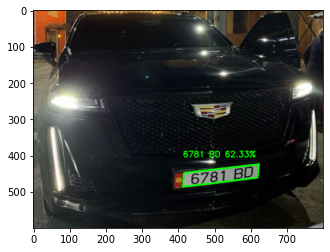

In [48]:
reader = Reader(['en'])
detection = reader.readtext(license_plate)

if len(detection) == 0:
    text = "Impossible to find the cars license plate"
    cv2.putText(image, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 3)
#     cv2.imshow('Image', image)
#     cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

else:
    cv2.drawContours(image, [n_plate_cnt], -1, (0, 255, 0), 3)
    text = f"{detection[0][1]} {detection[0][2] * 100:.2f}%"
    cv2.putText(image, text, (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)
#     cv2.imshow('license plate', license_plate)
#     cv2.imshow('Image', image)
#     cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [39]:
import csv
import uuid
import os

In [ ]:
def save_results(text, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    cv2.imwrite(os.path.join(folder_path, img_name), image)
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

In [ ]:
save_results(text, 'detection_results.csv', 'Detection_Images')